In [1]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from tensorflow.keras import layers
from tensorflow.keras import Model

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=f7f2d881897a1ed16522ebad206962cee9e11afefcf3e4502781e54889b57b2b
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [3]:
!pip install wget

/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5


In [4]:

import wget
url1="https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
#1 download pretrained model
filename=wget.download(url1, "/tmp")
os.path.dirname(os.path.abspath(filename))
print(filename)

last layer output shape (None, 7, 7, 768)


In [5]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
#2 local dir of PTM
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

#3 define Next part of PTM
pre_trained_model= InceptionV3(input_shape=(150,150,3),
                               include_top=False,
                               weights=None)
#4 load PTM
pre_trained_model.load_weights(local_weights_file)
for layer in pre_trained_model.layers:
    layer.trainable=False

#pre_trained_model.summary()

#6 get desired layer of PTM
last_layer=pre_trained_model.get_layer("mixed7")
print("last layer output shape", last_layer.output_shape)
#7 get output of that layer of PTM
last_output=last_layer.output

In [6]:
from tensorflow.keras.optimizers import RMSprop

x=layers.Flatten()(last_output)
x=layers.Dense(1024,activation="relu")(x)
x=layers.Dropout(0.2)(x)
x=layers.Dense(1, activation="sigmoid")(x)

model=Model(pre_trained_model.input,x)
model.compile(
    optimizer=RMSprop(lr=.0001),
    loss = 'binary_crossentropy',
    metrics=["accuracy"]
)

model.summary()




Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [7]:
# Get the Horse or Human dataset
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip -O /tmp/horse-or-human.zip

# Get the Horse or Human Validation dataset
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip -O /tmp/validation-horse-or-human.zip 
  
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/training')
zip_ref.close()

local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation')
zip_ref.close()

--2021-03-18 18:40:32--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   181MB/s    in 0.8s    

2021-03-18 18:40:33 (181 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2021-03-18 18:40:33--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480

In [8]:
train_horses_dir = "/tmp/training/horses"# Your Code Here""
train_humans_dir = "/tmp/training/humans"# Your Code Here
validation_horses_dir = "/tmp/validation/horses"# Your Code Here
validation_humans_dir = "/tmp/validation/humans"# Your Code Here

train_horses_fnames = os.listdir(train_horses_dir) 
# Your Code Here
train_humans_fnames = os.listdir(train_humans_dir) 
# Your Code Here
validation_horses_fnames = os.listdir(validation_horses_dir) 
# Your Code Here
validation_humans_fnames = os.listdir(validation_humans_dir) 
# Your Code Here

print(len(train_horses_fnames))
print(len(train_humans_fnames))
print(len(validation_horses_fnames))
print(len(validation_humans_fnames))

# Expected Output:
# 500
# 527
# 128
# 128

500
527
128
128


In [9]:
# Define our example directories and files
train_dir = '/tmp/training'
validation_dir = '/tmp/validation'

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

# Expected Output:
# Found 1027 images belonging to 2 classes.
# Found 256 images belonging to 2 classes.

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [10]:
# Run this and see how many epochs it should take before the callback
# fires, and stops training at 99.9% accuracy
# (It should take less than 100 epochs)

callbacks = myCallback()# Your Code Here
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    steps_per_epoch = 1027/20,
    epochs = 20,
    validation_steps = 256/20,
    verbose = 1,
    callbacks=[callbacks])

Epoch 1/20
51/51 [==============================] - 48s 247ms/step - loss: 0.3829 - accuracy: 0.8777 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 2/20
51/51 [==============================] - 11s 216ms/step - loss: 0.0526 - accuracy: 0.9804 - val_loss: 0.0551 - val_accuracy: 0.9805
Epoch 3/20
51/51 [==============================] - 11s 217ms/step - loss: 0.0292 - accuracy: 0.9883 - val_loss: 0.0847 - val_accuracy: 0.9766
Epoch 4/20
51/51 [==============================] - 11s 215ms/step - loss: 0.0095 - accuracy: 0.9965 - val_loss: 0.0769 - val_accuracy: 0.9766
Epoch 5/20
51/51 [==============================] - 11s 216ms/step - loss: 0.0180 - accuracy: 0.9935 - val_loss: 0.0329 - val_accuracy: 0.9883
Epoch 6/20
51/51 [==============================] - 11s 220ms/step - loss: 0.0177 - accuracy: 0.9938 - val_loss: 0.0927 - val_accuracy: 0.9766
Epoch 7/20
51/51 [==============================] - 11s 216ms/step - loss: 0.0045 - accuracy: 0.9964 - val_loss: 0.0323 - val_accuracy: 0.9922

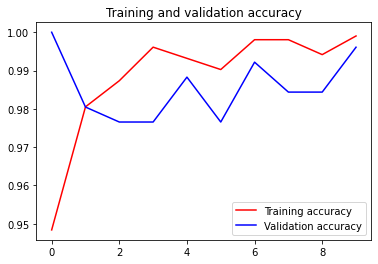

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()